In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
crop = pd.read_csv("data/Crop_recommendation.csv")
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
data = crop.copy()
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
data.isnull().sum().any()


False

In [5]:
for i in data.columns:
    print("column Name : ",i.upper())
    print("No. of unique values : {} \n".format(data[i].nunique()))
    if(data[i].dtype == 'object'):
        print('Unique values : ',pd.unique(data[i]))

column Name :  N
No. of unique values : 137 

column Name :  P
No. of unique values : 117 

column Name :  K
No. of unique values : 73 

column Name :  TEMPERATURE
No. of unique values : 2200 

column Name :  HUMIDITY
No. of unique values : 2200 

column Name :  PH
No. of unique values : 2200 

column Name :  RAINFALL
No. of unique values : 2200 

column Name :  LABEL
No. of unique values : 22 

Unique values :  ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [6]:
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()
data['Encoded_label'] = encod.fit_transform(data.label) #label will be encoded in alphabetical order


In [7]:
data.head()


,N,P,K,temperature,humidity,ph,rainfall,label,Encoded_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20


In [8]:
a = pd.DataFrame(pd.unique(data.label));
a.rename(columns={0:'label'},inplace=True)
b = pd.DataFrame(pd.unique(data.Encoded_label));
b.rename(columns={0:'encoded'},inplace=True)
classes = pd.concat([a,b],axis=1).sort_values('encoded').set_index('label')
classes

,encoded
label,
apple,0
banana,1
blackgram,2
chickpea,3
coconut,4
coffee,5
cotton,6
grapes,7
jute,8


In [9]:
data = data.drop_duplicates()

<AxesSubplot:>

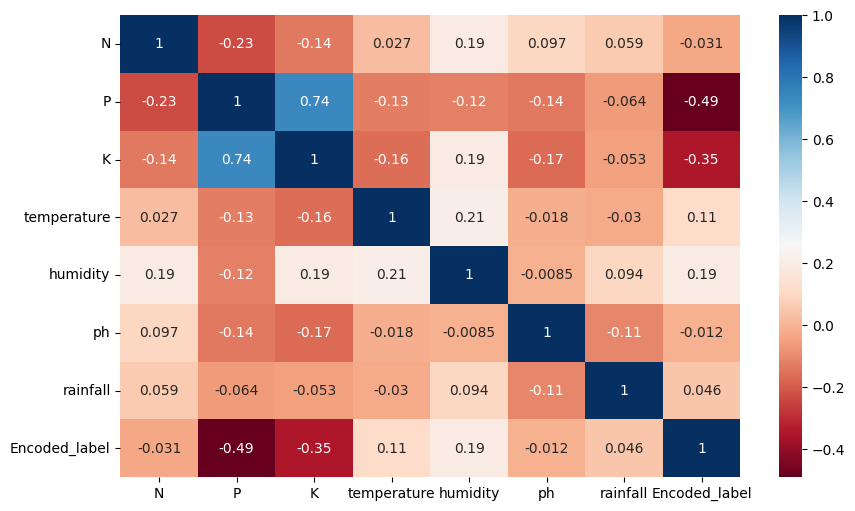

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='RdBu')

Variable Name : N


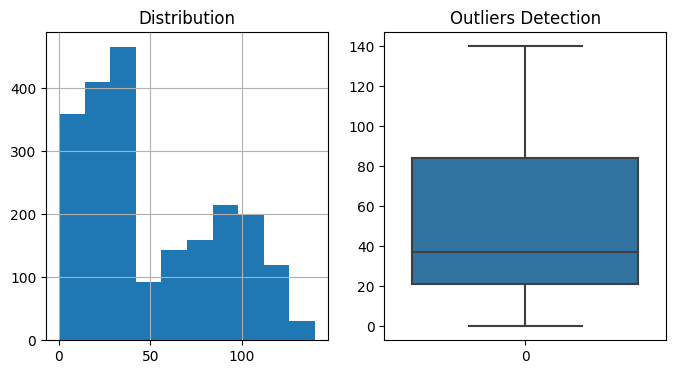



Variable Name : P


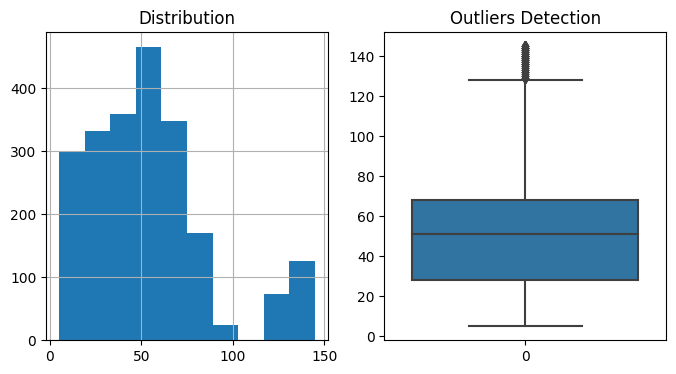



Variable Name : K


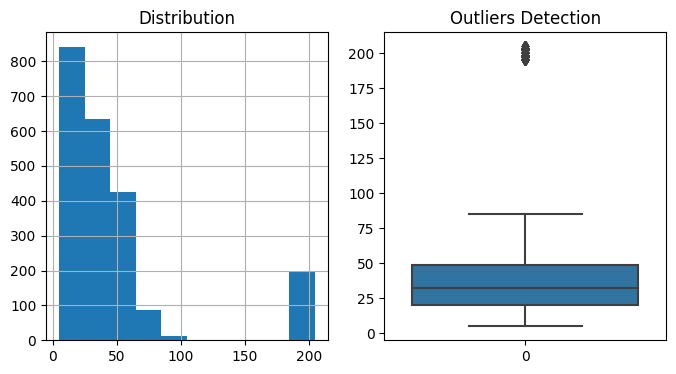



Variable Name : TEMPERATURE


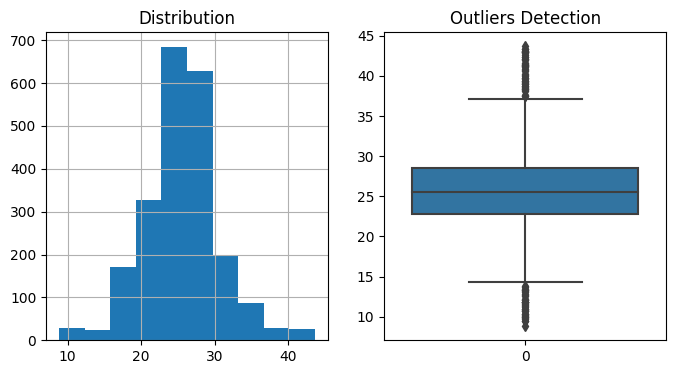



Variable Name : HUMIDITY


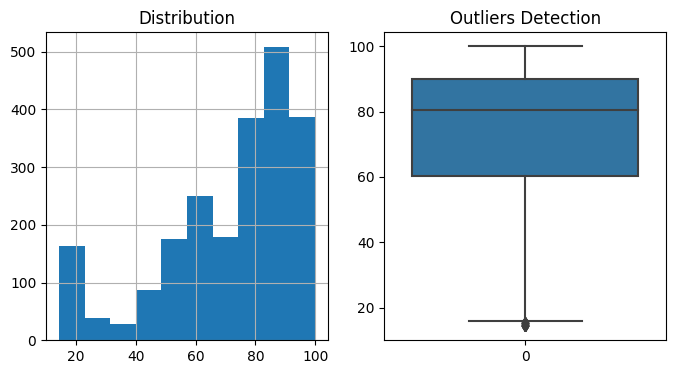



Variable Name : PH


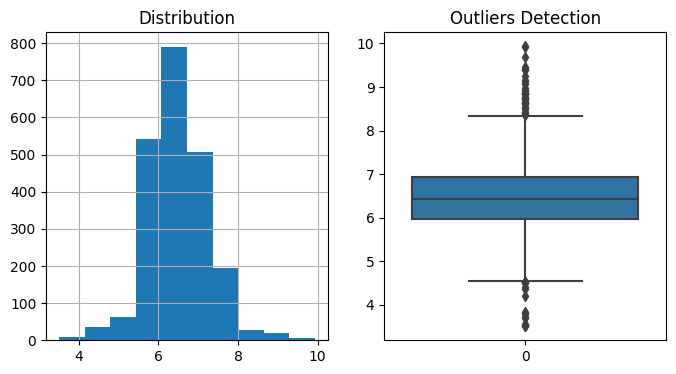



Variable Name : RAINFALL


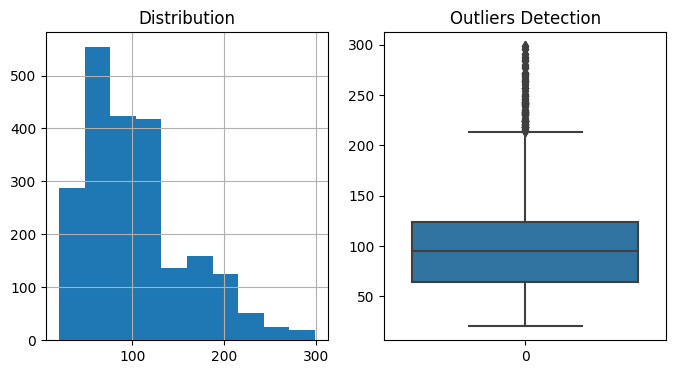

In [11]:
for i in data.columns[:-2]:
    print('Variable Name :',i.upper())
    fig, axes = plt.subplots(1,2,figsize=(8,4))
    axes[0].set_title('Distribution')
    axes[1].set_title('Outliers Detection')
    data[i].hist(ax=axes[0])
    sns.boxplot(data[i],ax=axes[1])
    plt.show()
    print('\n')
    

In [12]:
x = data.iloc[:,:-2]
y = data.Encoded_label
print('Input variables \n',x.head())
print('\nOutput Variable\n',y.head())

Input variables 
     N   P   K  temperature   humidity        ph    rainfall
0  90  42  43    20.879744  82.002744  6.502985  202.935536
1  85  58  41    21.770462  80.319644  7.038096  226.655537
2  60  55  44    23.004459  82.320763  7.840207  263.964248
3  74  35  40    26.491096  80.158363  6.980401  242.864034
4  78  42  42    20.130175  81.604873  7.628473  262.717340

Output Variable
 0    20
1    20
2    20
3    20
4    20
Name: Encoded_label, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)
print('Shape of Splitting :')
print('x_train = {}, x_test = {}, y_train = {}, y_test = {}'.format(x_train.shape,x_test.shape,y_train.shape,y_test.shape))

Shape of Splitting :
x_train = (1760, 7), x_test = (440, 7), y_train = (1760,), y_test = (440,)


In [14]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()
X_train = mx.fit_transform(x_train)
X_test = mx.transform(x_test)


In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test=sc.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score


In [17]:
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
}

In [18]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.9636363636363636
SVC model with accuracy: 0.9818181818181818
KNeighborsClassifier model with accuracy: 0.9704545454545455
DecisionTreeClassifier model with accuracy: 0.9795454545454545
RandomForestClassifier model with accuracy: 0.990909090909091


In [20]:
rand = RandomForestClassifier()
pred_rand = rand.fit(x_train,y_train).predict(x_test)
acc_rand = accuracy_score(y_test,pred_rand)
acc_rand


0.9931818181818182

In [21]:
rand.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [22]:
from sklearn.metrics import classification_report, accuracy_score, plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

param = {'n_estimators':range(10,50,10),
         'criterion':['gini'],
         'max_depth':range(1,20,2),
         'max_features':[1,2,3],
         'min_samples_leaf':range(1,10,2),
         'min_samples_split':range(1,40,10)}
grid_rand = GridSearchCV(rand,param,cv=5,n_jobs=-1,verbose=1)
grid_rand.fit(x_train,y_train)

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


/Users/aanchalpatel/Desktop/agriculture portal/.venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3000 fits failed out of a total of 12000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/aanchalpatel/Desktop/agriculture portal/.venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/aanchalpatel/Desktop/agriculture portal/.venv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/Users/aanchalpatel/Desktop/agriculture portal/.ve

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': range(1, 20, 2),
                         'max_features': [1, 2, 3],
                         'min_samples_leaf': range(1, 10, 2),
                         'min_samples_split': range(1, 40, 10),
                         'n_estimators': range(10, 50, 10)},
             verbose=1)

In [23]:
print(grid_rand.best_params_)
print(grid_rand.best_score_)

{'criterion': 'gini', 'max_depth': 13, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 11, 'n_estimators': 40}
0.996590909090909


Confusion Matrix : 



/Users/aanchalpatel/Desktop/agriculture portal/.venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


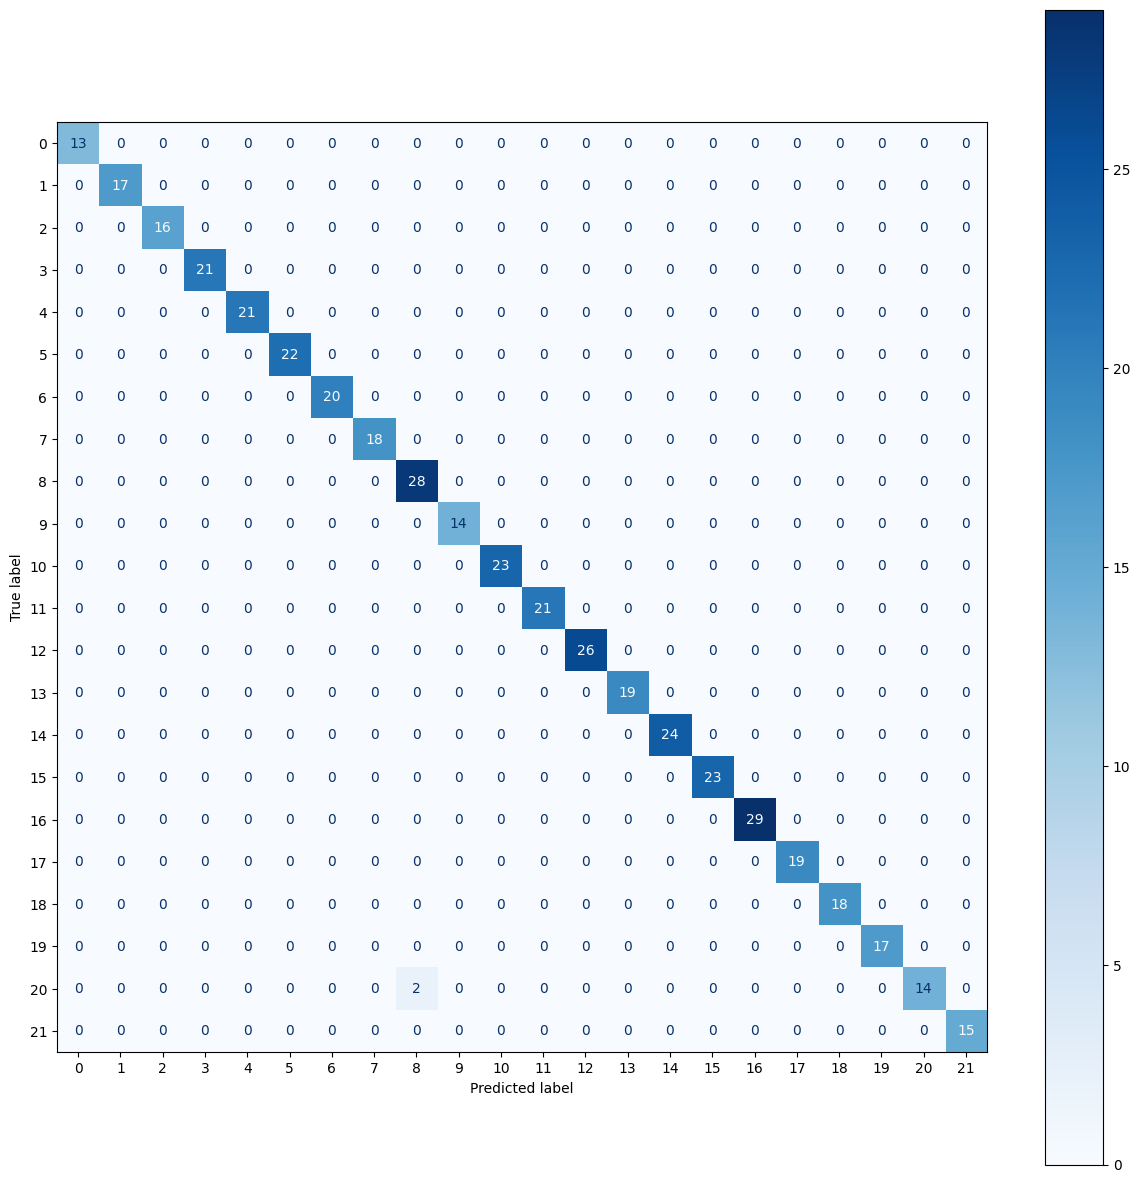

In [24]:
pred_rand = grid_rand.predict(x_test)
print('Confusion Matrix : \n')
fig, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(grid_rand,x_test,y_test,ax=ax,cmap=plt.cm.Blues)
plt.show()

In [25]:
print('REPORT : \n',classification_report(y_test,pred_rand))

REPORT : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.93      1.00      0.97        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.00        29
          17    

In [26]:
import pickle
pickle_out = open('crop_recom.pkl','wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [27]:
a = [[80,35,40,30,80,7.5,100]]

In [29]:
pickle_in = open('crop_recom.pkl','rb')
model = pickle.load(pickle_in)
pre = model.predict_proba(a)
pre = pd.DataFrame(data = np.round(pre.T*100,2), index=classes.index,columns=['predicted_values'])
pre

/Users/aanchalpatel/Desktop/agriculture portal/.venv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


,predicted_values
label,
apple,0.00
banana,17.50
blackgram,3.50
chickpea,0.00
coconut,1.25
coffee,19.74
cotton,10.71
grapes,2.50
jute,14.94


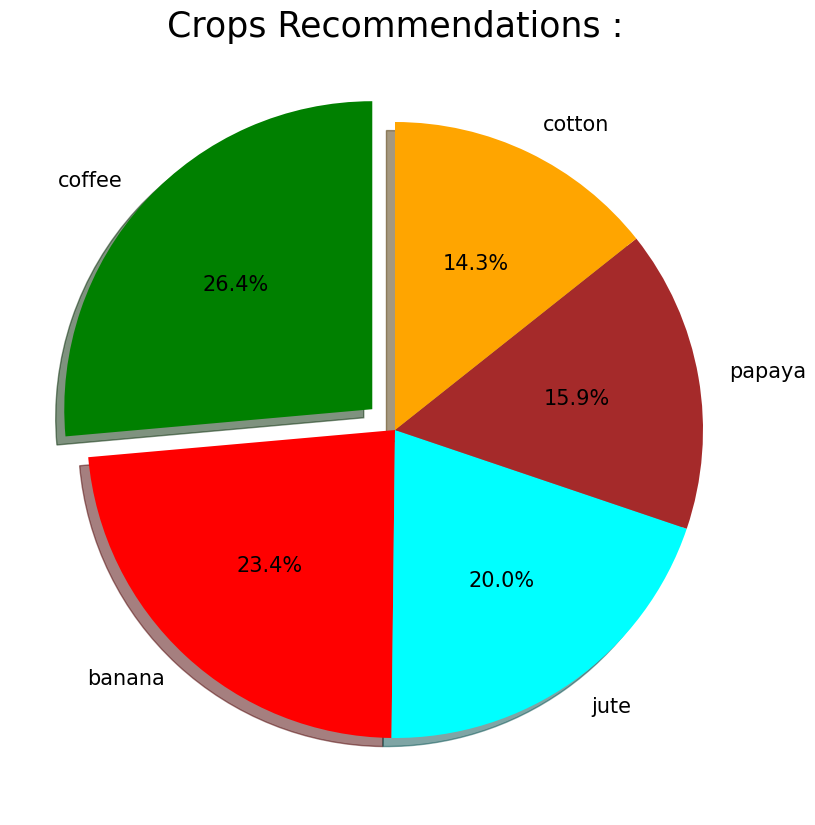

In [30]:
high = pre.predicted_values.nlargest(5)
plt.figure(figsize=(15,10))
plt.rcParams['font.size']=15
plt.title('Crops Recommendations :',fontdict={'fontsize': 25, 'fontweight': 'medium'})
plt.pie(x=high,labels=high.index,autopct='%1.1f%%',explode=(0.1, 0, 0, 0, 0),shadow=True,startangle=90,
        colors=['green','red','cyan','brown','orange'])

plt.show()